**Савин Александр М80-407Б-19**   
Алгоритм: Случайный лес  
Ссылка на dataset: https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

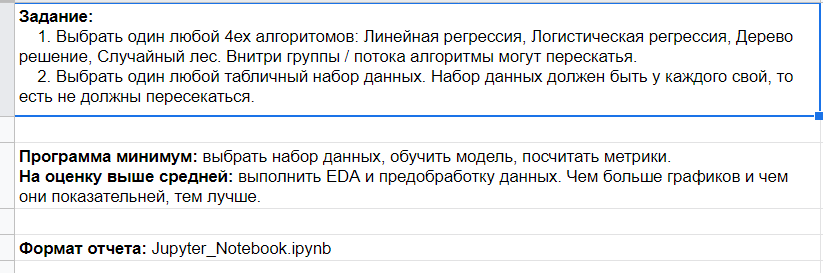

---

In [ ]:
def draw(xs, ys, coefs):
    fig, ax = plt.subplots(1, 1)
    for i in range(1, len(xs)):
        plot_x = np.linspace(xs[i - 1], xs[i], 100)
        plot_y = coefs[i - 1][0] + coefs[i - 1][1] * (plot_x - x[i - 1]) + coefs[i - 1][2] * (plot_x - x[i - 1]) ** 2 + coefs[i - 1][3] * (plot_x - x[i - 1]) ** 3
        ax.plot(plot_x, plot_y, "-r")
    ax.scatter(xs, ys)
    plt.show()
coefs = []
coefs.append([-2.2026, 5.6741, 0.0000, -4.0657])
coefs.append([-0.1931, 3.7226, -4.8788, 4.3649])
coefs.append([0.7946, 1.9147, 0.3591, -0.8684])
coefs.append([1.5624, 1.7851, -0.6830, 0.5692])

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

import io

---

Импортируем датасет

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Airlines.csv to Airlines (2).csv


In [ ]:
print (uploaded['Airlines.csv'][:200].decode('utf-8') + '...')
df = pd.read_csv(io.StringIO(uploaded['Airlines.csv'].decode('utf-8')))

id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
1,CO,269,SFO,IAH,3,15,205,1
2,US,1558,PHX,CLT,3,15,222,1
3,AA,2400,LAX,DFW,3,20,165,1
4,AA,2466,SFO,DFW,3,20,195,1
5,AS,108,ANC,SEA,...


---

Рассмотрим датасет

In [ ]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [ ]:
df.shape

(539383, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [ ]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [ ]:
df = df.rename(columns = {"Delay":"Target"})
model_features = df.columns.drop("Target")
model_target = "Target"

print(f"Model Features: {model_features}\n")
print(f"Model Features: {model_target}")

Model Features: Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length'],
      dtype='object')

Model Features: Target


In [ ]:
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
categorical_features_all = df[model_features].select_dtypes(include = "object").columns

print(f"Numerical Features: {numerical_features_all}")
print(f"Categorical Features: {categorical_features_all}")

Numerical Features: Index(['id', 'Flight', 'DayOfWeek', 'Time', 'Length'], dtype='object')
Categorical Features: Index(['Airline', 'AirportFrom', 'AirportTo'], dtype='object')


0    299119
1    240264
Name: Target, dtype: int64


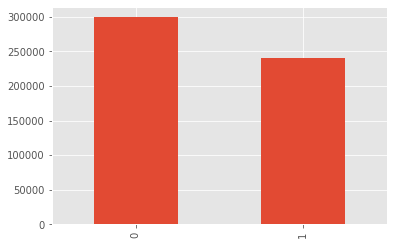

In [ ]:
print(df[model_target].value_counts())
df[model_target].value_counts().plot.bar()
plt.show()

In [ ]:
for c in categorical_features_all:
    print(df[c].value_counts())

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64
ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64
ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64


---

Рассмотрим статистику

Airline


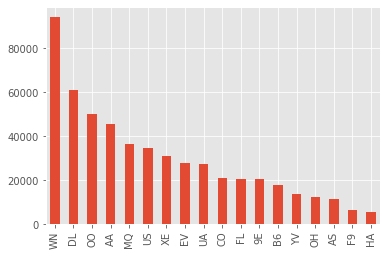

In [ ]:
for c in categorical_features_all:
    if len(df[c].value_counts())<100:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

id


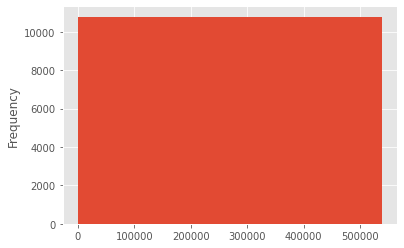

Flight


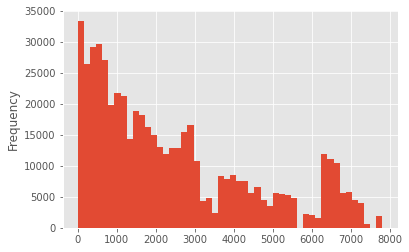

DayOfWeek


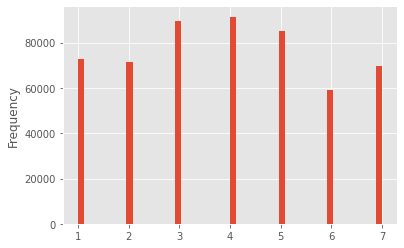

Time


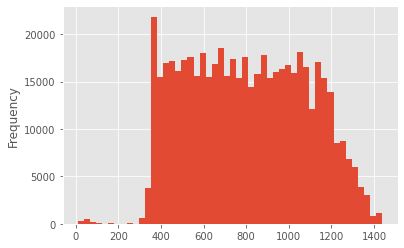

Length


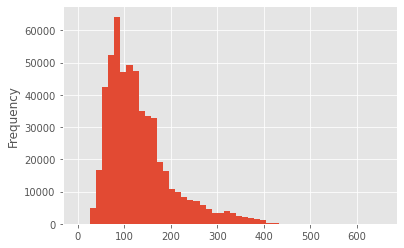

In [ ]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins = 50)
    plt.show()

In [ ]:
for c in numerical_features_all:
    print(df[c].value_counts(bins = 10))

(-538.3829999999999, 53939.2]    53939
(215753.8, 269692.0]             53939
(485444.8, 539383.0]             53939
(53939.2, 107877.4]              53938
(107877.4, 161815.6]             53938
(161815.6, 215753.8]             53938
(269692.0, 323630.2]             53938
(323630.2, 377568.4]             53938
(377568.4, 431506.6]             53938
(431506.6, 485444.8]             53938
Name: id, dtype: int64
(-6.814, 782.3]     145944
(782.3, 1563.6]      95969
(1563.6, 2344.9]     74526
(2344.9, 3126.2]     68619
(6251.4, 7032.7]     44744
(3907.5, 4688.8]     35900
(3126.2, 3907.5]     27747
(4688.8, 5470.1]     24222
(7032.7, 7814.0]     10893
(5470.1, 6251.4]     10819
Name: Flight, dtype: int64
(3.4, 4.0]      91445
(2.8, 3.4]      89746
(4.6, 5.2]      85248
(0.993, 1.6]    72769
(1.6, 2.2]      71340
(6.4, 7.0]      69879
(5.8, 6.4]      58956
(2.2, 2.8]          0
(4.0, 4.6]          0
(5.2, 5.8]          0
Name: DayOfWeek, dtype: int64
(581.6, 724.5]      84565
(438.7, 581.6]

In [ ]:
for c in numerical_features_all: 
    print(c)
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3-Q1
    print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
    
    dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
    df.drop(dropIndexes , inplace=True)
    dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
    df.drop(dropIndexes , inplace=True)

id
-269690.0 809074.0
Flight
-3837.5 8294.5
DayOfWeek
-2.5 9.5
Time
-140.0 1740.0
Length
-40.5 283.5


In [ ]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

id
(-538.381, 53939.0]     51524
(53939.0, 107877.0]     51360
(107877.0, 161815.0]    51571
(161815.0, 215753.0]    51412
(215753.0, 269691.0]    51540
(269691.0, 323629.0]    51251
(323629.0, 377567.0]    51364
(377567.0, 431505.0]    51173
(431505.0, 485443.0]    51313
(485443.0, 539381.0]    51225
Name: id, dtype: int64
Flight
(-6.814, 782.3]     129756
(782.3, 1563.6]      90805
(1563.6, 2344.9]     71980
(2344.9, 3126.2]     66947
(3126.2, 3907.5]     27669
(3907.5, 4688.8]     35898
(4688.8, 5470.1]     24222
(5470.1, 6251.4]     10819
(6251.4, 7032.7]     44744
(7032.7, 7814.0]     10893
Name: Flight, dtype: int64
DayOfWeek
(0.993, 1.6]    69400
(1.6, 2.2]      68077
(2.2, 2.8]          0
(2.8, 3.4]      85643
(3.4, 4.0]      87172
(4.0, 4.6]          0
(4.6, 5.2]      81106
(5.2, 5.8]          0
(5.8, 6.4]      55858
(6.4, 7.0]      66477
Name: DayOfWeek, dtype: int64
Time
(8.57, 152.9]        1113
(152.9, 295.8]        142
(295.8, 438.7]      56677
(438.7, 581.6]      78124
(

id


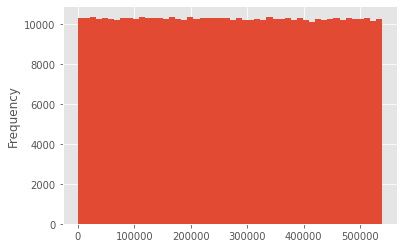

Flight


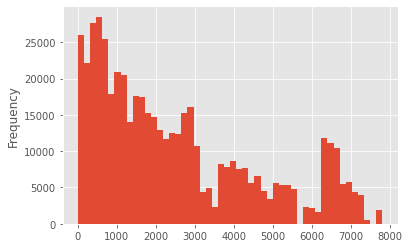

DayOfWeek


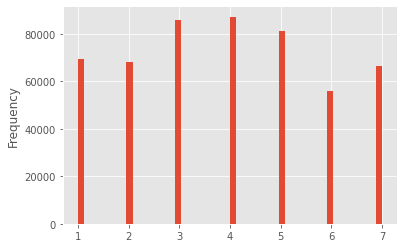

Time


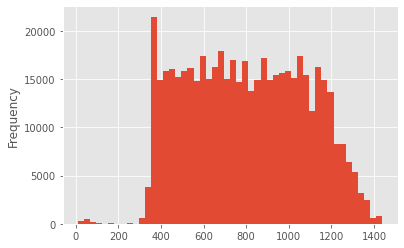

Length


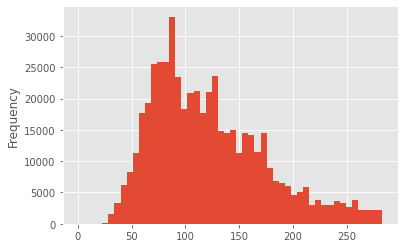

In [ ]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=50)
    plt.show()

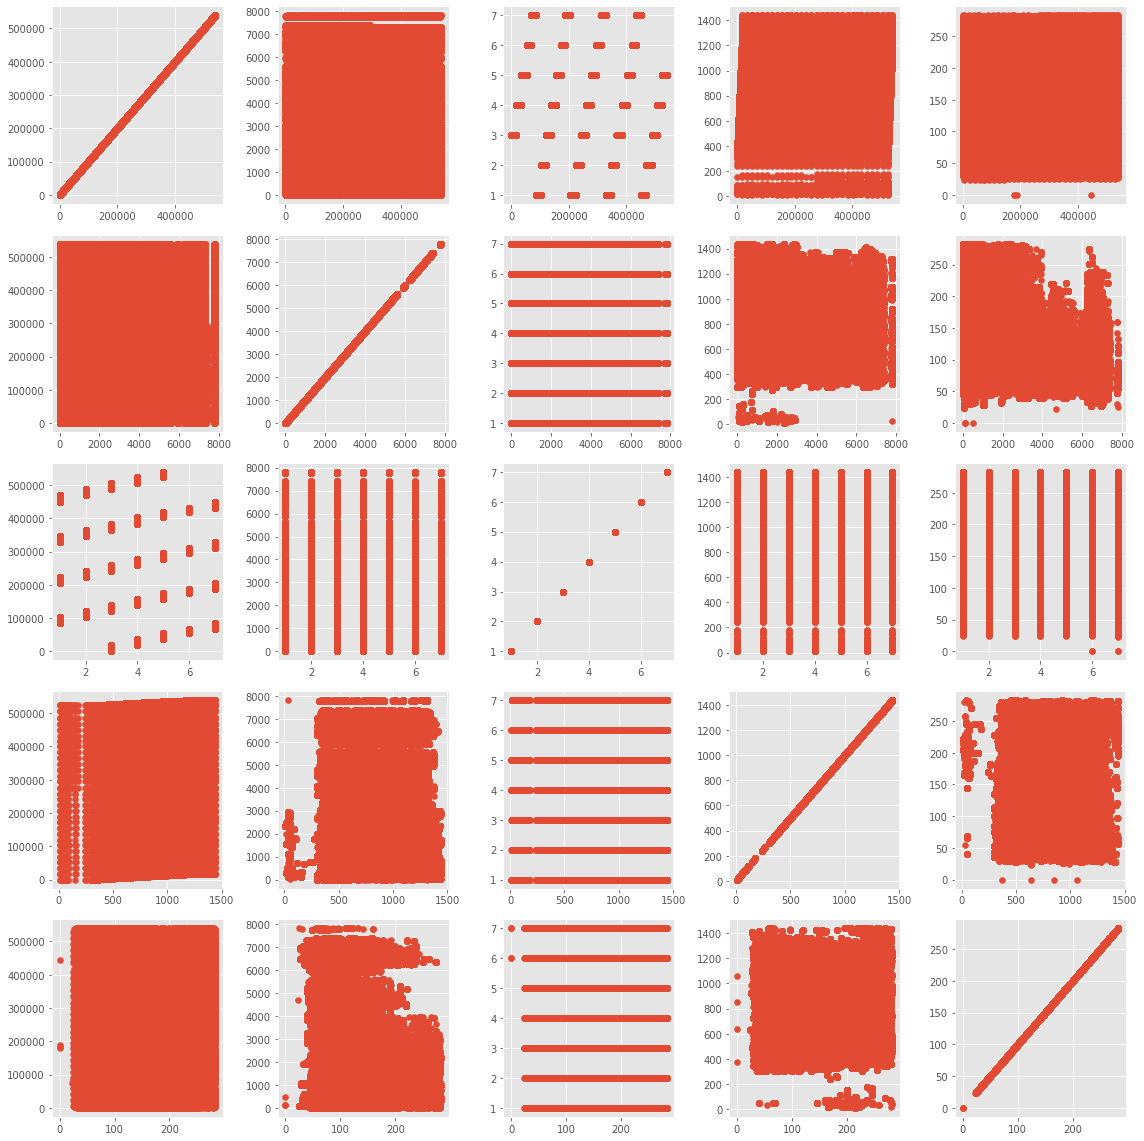

In [ ]:
fig, axes = plt.subplots(len(numerical_features_all), len(numerical_features_all), figsize=(16, 16), sharex=False, sharey=False)
for i in range(0,len(numerical_features_all)):
    for j in range(0,len(numerical_features_all)):
        axes[i,j].scatter(x = df[numerical_features_all[i]], y = df[numerical_features_all[j]])
fig.tight_layout()

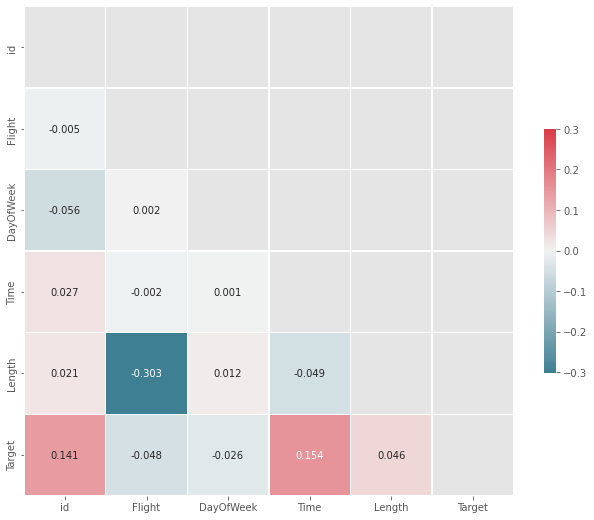

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True,fmt =".3f")
plt.show()

---

In [ ]:
import seaborn as sns

import plotly.express as px
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

---

Подготовка данных

In [ ]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Target         0
dtype: int64

In [ ]:
df.dtypes

id             int64
Airline        int64
Flight         int64
AirportFrom    int64
AirportTo      int64
DayOfWeek      int64
Time           int64
Length         int64
Target         int64
dtype: object

In [ ]:
le = preprocessing.LabelEncoder()

df['Airline'] = le.fit_transform(df['Airline'])
df['AirportFrom'] = le.fit_transform(df['AirportFrom'])
df['AirportTo'] = le.fit_transform(df['AirportTo'])
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Target
0,1,4,269,252,134,3,15,205,1
1,2,14,1558,216,60,3,15,222,1
2,3,1,2400,153,80,3,20,165,1
3,4,1,2466,252,80,3,20,195,1
4,5,2,108,14,251,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539374,539375,5,2354,153,16,5,1435,255,0
539375,539376,8,58,153,16,5,1435,250,0
539376,539377,3,717,147,259,5,1439,220,1
539377,539378,3,739,147,224,5,1439,223,1


In [ ]:
X=pd.DataFrame({'DayOfWeek': df['DayOfWeek'],
                'Time': df['Time'],
                'Length': df['Length']            
               })
y=df['Target']

In [ ]:
X

,DayOfWeek,Time,Length
0,3,15,205
1,3,15,222
2,3,20,165
3,3,20,195
4,3,30,202
...,...,...,...
539374,5,1435,255
539375,5,1435,250
539376,5,1439,220
539377,5,1439,223


In [ ]:
y

0         1
1         1
2         1
3         1
4         0
         ..
539374    0
539375    0
539376    1
539377    1
539380    0
Name: Target, Length: 513733, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, stratify= y)

In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

0.585582662860109

In [ ]:
from sklearn import metrics
print("Accuracy metric : ", metrics.accuracy_score(y_test, y_pred))
print("MAE metric:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE metric:", metrics.mean_squared_error(y_test, y_pred))

Accuracy metric :  0.585582662860109
MAE metric: 0.414417337139891
MSE metric: 0.414417337139891


In [ ]:
param_grid = [
      {'bootstrap': [False, True],
      'n_estimators': [80,90, 100, 110, 130],
      'max_features': ['log2', 'sqrt'],
      'min_samples_leaf': [10, 12, 14],
      'min_samples_split': [3, 5, 7]
      },
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_forest_classifier = RandomForestClassifier()
grid_search = RandomizedSearchCV(random_forest_classifier, param_grid, cv=5,scoring='neg_mean_squared_error', refit=True)

In [ ]:
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = random_forest_classifier.predict(X_test)

In [ ]:
random_forest_classifier.score(X_test, y_test)

0.5859589929924734

In [ ]:
print("Accuracy metric : ", metrics.accuracy_score(y_test, y_pred))
print("MAE metric:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE metric:", metrics.mean_squared_error(y_test, y_pred))

Accuracy metric :  0.5859589929924734
MAE metric: 0.4140410070075266
MSE metric: 0.4140410070075266
